In [2]:
# Importiere die notwendigen Bibliotheken
import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML
import pandas as pd
from tabulate import tabulate
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1. Lese die CSV-Datei ein
df = pd.read_csv('ils_results1.csv')

# 2. Definiere die Listen mit den Werten, nach denen du filtern möchtest
sublists_to_modify_list = [2]
consecutive_to_remove_list = [3]
threshold_list = [3]

# 3. Filtere die Zeilen, die die gewünschten Werte in den entsprechenden Spalten haben
filtered_df = df[
    (df['sublists_to_modify'].isin(sublists_to_modify_list)) &
    (df['consecutive_to_remove'].isin(consecutive_to_remove_list)) &
    (df['threshold'].isin(threshold_list))
].copy()  # Verwende .copy() um sicherzustellen, dass du auf einer Kopie arbeitest

# 4. Füge die neue Spalte 'neighborhoodEvaluationStrategyDelta' hinzu mit dem Wert 'BestImprovement', falls sie nicht existiert
filtered_df.insert(filtered_df.columns.get_loc('TotalProfit'), 'neighborhoodEvaluationStrategyDelta', 'BestImprovement')

# 5. Speichere die gefilterten Zeilen in eine neue CSV-Datei
filtered_df.to_csv('ils_results_BestImprovement.csv', index=False)

In [4]:
# Lade die drei CSV-Dateien
csv1 = pd.read_csv('ils_results_BestImprovement.csv')
csv2 = pd.read_csv('ils_results_FirstImprovement.csv')


# Kombiniere die Dateien
combined_csv = pd.concat([csv1, csv2])

# Speichere die kombinierte Datei in einer neuen CSV
combined_csv.to_csv('ils_results_Improvement.csv', index=False)

In [5]:
# 1. Lese die CSV-Datei ein
# Ersetze 'sails_results.csv' durch den Pfad zu deiner CSV-Datei
df = pd.read_csv('ils_results_Improvement.csv')

sorted_df = df.sort_values(by='TotalProfit', ascending=False)
# 2. Formatiere die Tabelle mit Pandas Styling für die Anzeige in Jupyter Notebook
styled_df = sorted_df.style.format({
    'TotalProfit': '{:.0f}',   # Formatiere TotalProfit mit 2 Nachkommastellen
    'WaitingTime': '{:.0f}',   # Formatiere WaitingTime mit 2 Nachkommastellen
    'TotalTasks': '{:.0f}',   # Formatiere TotalTasks ohne Nachkommastellen
    'temp_decrease_factor': '{:.2f}',
    'min_temperature' : '{:.0e}'
})

# Zeige die formatierte Tabelle in Jupyter Notebook an
display(styled_df)

# 3. Zeige die Tabelle als ASCII-Tabelle mit 'tabulate' in der Konsole an
# Diese Ausgabe sieht in der Konsole oder im Terminal gut aus
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

#Sortiere die Tabelle nach der Spalte 'TotalProfit' absteigend

,Instance,MainTasks,sublists_to_modify,consecutive_to_remove,threshold,neighborhoodEvaluationStrategyDelta,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit
6,7_8_1,True,2,3,3,FirstImprovement,2151,19592,922,258,382.580200,360
2,7_8_1,True,2,3,3,BestImprovement,2149,22969,920,208,382.959600,360
7,7_5_1,False,2,3,3,FirstImprovement,2039,5095,788,284,382.161100,360
3,7_5_1,False,2,3,3,BestImprovement,2036,4145,791,283,382.902700,360
5,7_5_1,True,2,3,3,FirstImprovement,1657,11169,634,281,375.613500,360
1,7_5_1,True,2,3,3,BestImprovement,1650,12761,638,229,376.024500,360
4,7_2_1,True,2,3,3,FirstImprovement,781,3674,278,448,363.838400,360
0,7_2_1,True,2,3,3,BestImprovement,778,4621,276,328,363.880200,360


In [6]:
df = pd.read_csv('ils_results_Improvement.csv')

# Round 'RunTime' to the nearest integer
df['RunTime'] = df['RunTime'].round(2).astype(int)

# Convert 'WaitingTime' to integers as it only has whole numbers
df['WaitingTime'] = df['WaitingTime'].astype(int)

# Rename specific columns
df = df.rename(columns={
    'min_temperature': 'End Temperature',
    'temp_decrease_factor': 'Decrease Factor',
    'start_temperature': 'Start Temperature',
    # Add more columns to rename as needed
})

#table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
df.head(3)

,Instance,MainTasks,sublists_to_modify,consecutive_to_remove,threshold,neighborhoodEvaluationStrategyDelta,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit
0,7_2_1,True,2,3,3,BestImprovement,778,4621,276,328,363,360
1,7_5_1,True,2,3,3,BestImprovement,1650,12761,638,229,376,360
2,7_8_1,True,2,3,3,BestImprovement,2149,22969,920,208,382,360


##### Calculale RPD


In [7]:
#Find the maximum 'TotalProfit' for each 'Instance'
max_profit_per_instance_task = df.groupby(['Instance', 'MainTasks'])['TotalProfit'].transform('max')
# Calculate RPD
df['RPD'] = ((max_profit_per_instance_task - df['TotalProfit']) / max_profit_per_instance_task) * 100

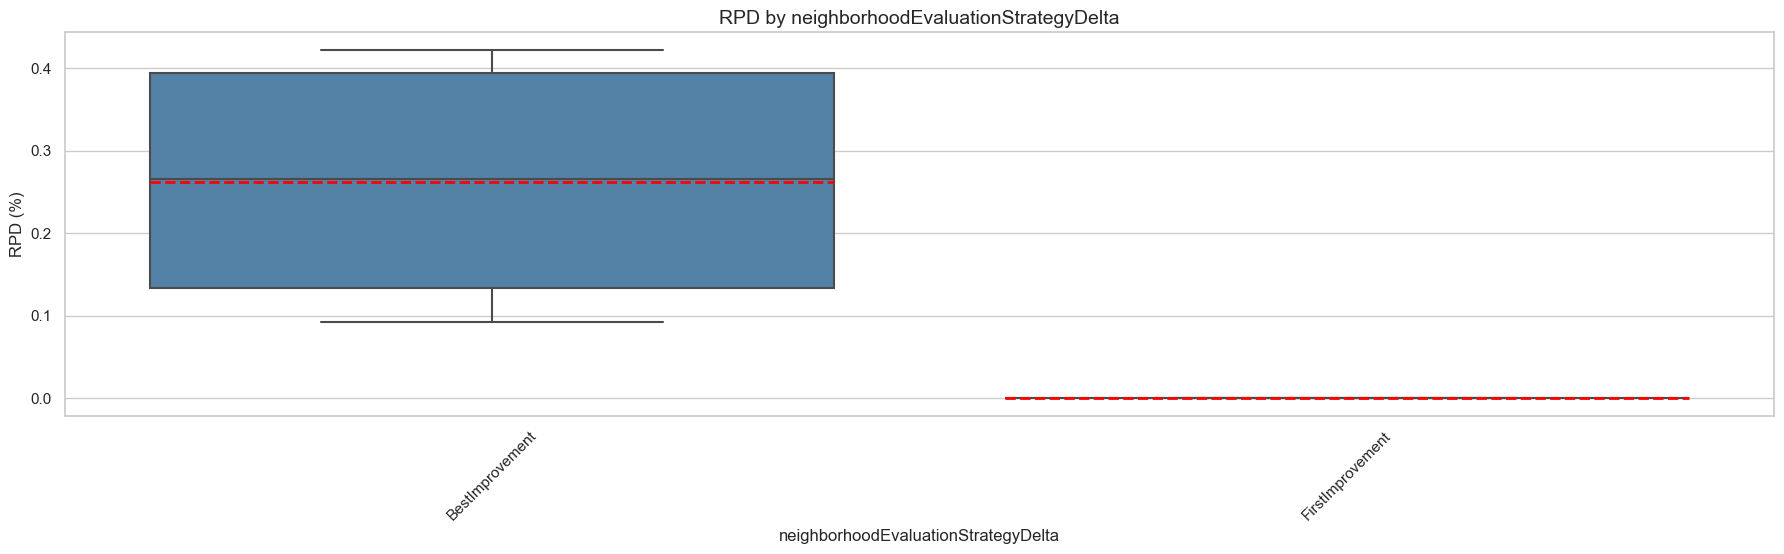

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot
parameters = ['neighborhoodEvaluationStrategyDelta']

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Create subplots - one for each parameter
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6), squeeze=False)

# Loop through the parameters and create boxplots in subplots
for i, param in enumerate(parameters):
    # Ensure 'param' is treated as categorical for the x-axis
    sns.boxplot(x=df[param], y=df['RPD'], showmeans=True, meanline=True,
                meanprops={"color": "red", "ls": "--", "lw": 2},
                color=boxplot_color, ax=axes[0, i])  # Access subplot in a 2D array
    
    # Set titles for each subplot
    axes[0, i].set_title(f'RPD by {param}', fontsize=14)
    axes[0, i].set_xlabel(param, fontsize=12)
    axes[0, i].set_ylabel('RPD (%)', fontsize=12)

    # Rotate x-axis labels for better readability if needed
    axes[0, i].tick_params(axis='x', rotation=45)

# Adjust the layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure as a PNG file
plt.savefig('rpd_box_plots_scientific.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()